In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
prolongations = pd.read_csv('prolongations.csv')
prolongations.head(3)

dic_for_russian_month = {'январь': '01', 'февраль': '02', 'март': '03', 'апрель': '04',
    'май': '05', 'июнь': '06', 'июль': '07', 'август': '08',
    'сентябрь': '09', 'октябрь': '10', 'ноябрь': '11', 'декабрь': '12'}
valid_prolongations = prolongations.copy()
valid_prolongations['month'] = valid_prolongations['month'].apply(lambda x: f"{dic_for_russian_month[x.split(' ')[0]]} {x.split(' ')[1]}")
valid_prolongations['month'] = pd.to_datetime(valid_prolongations['month'], format = '%m %Y', dayfirst= True)
prolongations.head(3)


,id,month,AM
0,42,ноябрь 2022,Васильев Артем Александрович
1,453,ноябрь 2022,Васильев Артем Александрович
2,548,ноябрь 2022,Михайлов Андрей Сергеевич


In [3]:
finincial = pd.read_csv('financial_data.csv')
finincial.head(3)

,id,Причина дубля,Ноябрь 2022,Декабрь 2022,Январь 2023,Февраль 2023,Март 2023,Апрель 2023,Май 2023,Июнь 2023,Июль 2023,Август 2023,Сентябрь 2023,Октябрь 2023,Ноябрь 2023,Декабрь 2023,Январь 2024,Февраль 2024,Account
0,42,NaN,"36 220,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович
1,657,первая часть оплаты,стоп,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович
2,657,вторая часть оплаты,стоп,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович


Index(['id', 'month', 'AM'], dtype='object')

In [4]:
contracts = prolongations.merge(finincial, left_on = 'id', right_on = 'id', how = 'inner')
print(len(contracts))
print(len(prolongations), len(finincial))
contracts.head(3)
contracts['id'].value_counts()


725
477 451


id
154     18
798     15
797     12
914     12
708     10
        ..
747      1
42       1
955      1
1004     1
913      1
Name: count, Length: 313, dtype: int64

In [8]:
import re
def clean_num_str(s):
    if not isinstance(s, str):
        return s
    s = re.sub(r'\s+', '', s)
    s = s.replace(',', '.')
    return s

In [18]:


from dateutil.relativedelta import relativedelta
# такие инлдексы выбрал тк заранее посмотрел columns (индексы лдя месяцев)
contracts[contracts.columns[4:-1]] = contracts[contracts.columns[4:-1]].replace('в ноль', 0)
contracts = contracts.drop_duplicates('id', keep = 'last')

for i in range(4, len(contracts.columns) - 1):
    contracts = contracts[~(contracts[contracts.columns[i]].isin(['стоп', 'end']) )]
print(len(contracts), "длина итогового датафрейма после исключения строк со стоп и end и дупликатов")

new_columns = list(contracts.columns)
# со строчной буквы будут колонки
new_columns[4:-1] = [x.lower() for x in contracts.columns[4:-1]]
contracts.columns = new_columns

contracts[contracts.columns[4:-1]] = contracts[contracts.columns[4:-1]].fillna(0)
#print(contracts[contracts.columns[9]].isnull())

for i in range(4, len(contracts.columns) - 1):
    col = contracts.columns[i]
    contracts[col] = contracts[col].apply(lambda x: float(clean_num_str(x)))
    contracts[col] = pd.to_numeric(contracts[col], errors='coerce').fillna(0).astype(float)

#print(contracts[contracts.columns[9]] == 0)
#contracts['август 2023'].value_counts()
contracts


263 длина итогового датафрейма после исключения строк со стоп и end и дупликатов


,id,month,AM,Причина дубля,ноябрь 2022,декабрь 2022,январь 2023,февраль 2023,март 2023,апрель 2023,...,июнь 2023,июль 2023,август 2023,сентябрь 2023,октябрь 2023,ноябрь 2023,декабрь 2023,январь 2024,февраль 2024,Account
0,42,ноябрь 2022,Васильев Артем Александрович,NaN,36220.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Васильев Артем Александрович
10,665,ноябрь 2022,Васильев Артем Александрович,NaN,10000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Васильев Артем Александрович
12,637,ноябрь 2022,Соколова Анастасия Викторовна,NaN,38045.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Соколова Анастасия Викторовна
13,419,ноябрь 2022,Михайлов Андрей Сергеевич,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Михайлов Андрей Сергеевич
14,578,ноябрь 2022,Попова Екатерина Николаевна,NaN,82800.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Попова Екатерина Николаевна
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,955,декабрь 2023,Смирнова Ольга Владимировна,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9300.0,9300.0,13200.0,17400.0,0.0,0.0,Смирнова Ольга Владимировна
720,1004,декабрь 2023,без А/М,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,34000.0,0.0,0.0,0.0,без А/М
722,281,декабрь 2023,Соколова Анастасия Викторовна,доп работы,21450.0,13300.0,15900.0,19850.0,17350.0,14650.0,...,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Соколова Анастасия Викторовна
723,785,декабрь 2023,Соколова Анастасия Викторовна,NaN,0.0,0.0,0.0,5306.6,12898.1,5287.0,...,8600.0,3860.0,8600.0,700.0,700.0,0.0,0.0,0.0,0.0,Соколова Анастасия Викторовна


In [10]:
def determine_month(current_month):
    current_month_date = pd.to_datetime(f"{dic_for_russian_month[current_month.split()[0]]}-01-{current_month.split()[1]}")
    prev_month_date = current_month_date - relativedelta(months=1)
    prev2_month_date = current_month_date - relativedelta(months=2)
    prev_month = f"{month_names[prev_month_date.month]} {prev_month_date.year}"
    prev2_month = f"{month_names[prev2_month_date.month]} {prev2_month_date.year}"
    return prev_month, prev2_month

In [92]:

month_names = {
        1: 'январь', 2: 'февраль', 3: 'март', 4: 'апрель',
        5: 'май', 6: 'июнь', 7: 'июль', 8: 'август',
        9: 'сентябрь', 10: 'октябрь', 11: 'ноябрь', 12: 'декабрь'
    }
current_month = 'февраль 2023'

def find_coeffs_monthly(contracts, current_month):
    contracts1 = contracts.copy()
    print(len(contracts1))
    prev_month, prev2_month = determine_month(current_month)
    print(prev_month, prev2_month)
    
    contracts1 = contracts1[contracts1['month'] == prev_month]
    if not contracts1.empty:
        print(len(contracts1))
        contracts1.columns
        contracts1 = contracts1.groupby('AM').sum(numeric_only= True).reset_index()
        contracts1['calculate_month'] = current_month
        contracts1.loc[len(contracts1)] = ['Company', np.nan] + [contracts1[col].sum() for col in contracts1.columns[2:-1]] + [current_month]
    
        contracts1['coeff1'] = contracts1[current_month] / contracts1[prev_month]
        
    contracts2 = contracts.copy()
    contracts2 = contracts2[contracts2['month'] == prev2_month]
    if not contracts2.empty:
        contracts2 = contracts2.groupby('AM').sum(numeric_only= True).reset_index()
        contracts2['calculate_month'] = current_month 
        contracts2 = contracts2[contracts2[prev_month] == 0]
        contracts2.loc[len(contracts2)] = ['Company', np.nan] + [contracts2[col].sum() for col in contracts2.columns[2:-1]] + [current_month]
        contracts2['coeff2'] = contracts2[current_month] / contracts2[prev2_month]

    #if not contracts1.empty:
        #fig = plt.figure(figsize = (12, 12))
        #sns.barplot(data = contracts1, x = 'AM', y = 'coeff1')
        #plt.show()
    
    return contracts1, contracts2

#def calculate_coeffs_yearly(contracts, current_year):
df_first_all, df_second_all = [], []
months_in_datas = [col for col in contracts.columns[4:-1]]
o, _ = find_coeffs_monthly(contracts, 'декабрь 2022')

for month in months_in_datas:
    df_first, df_second = find_coeffs_monthly(contracts, month)
    df_first_all.append(df_first)
    df_second_all.append(df_second)

with pd.ExcelWriter('Ratio_prolongation_first_for_every_month.xlsx', engine='openpyxl', options={'strings_to_urls': False}) as writer:
    for i, month in enumerate(months_in_datas):
        # Пропускаем пустые DataFrame
        if df_first_all[i] is not None and len(df_first_all[i]) > 0:
            sheet_name = 'ratio1_' + month.replace(' ', '_')
            df_first_all[i].to_excel(writer, sheet_name=sheet_name, index=False)
        
        if df_second_all[i] is not None and len(df_second_all[i]) > 0:
            sheet_name = 'ratio2_' + month.replace(' ', '_')
            df_second_all[i].to_excel(writer, sheet_name=sheet_name, index=False)
    
    
result_first_ratio, result_second_ratio = pd.concat(df_first_all, ignore_index= True), pd.concat(df_second_all, ignore_index= True)
result_first_ratio

263
ноябрь 2022 октябрь 2022
10
263
октябрь 2022 сентябрь 2022
263
ноябрь 2022 октябрь 2022
10
263
декабрь 2022 ноябрь 2022
28
263
январь 2023 декабрь 2022
10
263
февраль 2023 январь 2023
11
263
март 2023 февраль 2023
12
263
апрель 2023 март 2023
4
263
май 2023 апрель 2023
13
263
июнь 2023 май 2023
18
263
июль 2023 июнь 2023
13
263
август 2023 июль 2023
17
263
сентябрь 2023 август 2023
23
263
октябрь 2023 сентябрь 2023
8
263
ноябрь 2023 октябрь 2023
28
263
декабрь 2023 ноябрь 2023
68
263
январь 2024 декабрь 2023


TypeError: ExcelWriter.__new__() got an unexpected keyword argument 'options'

!pip install xlsxwriter

# Если не работает, попробуй:
!pip3 install xlsxwriter

# Или так:
!python -m pip install xlsxwriter

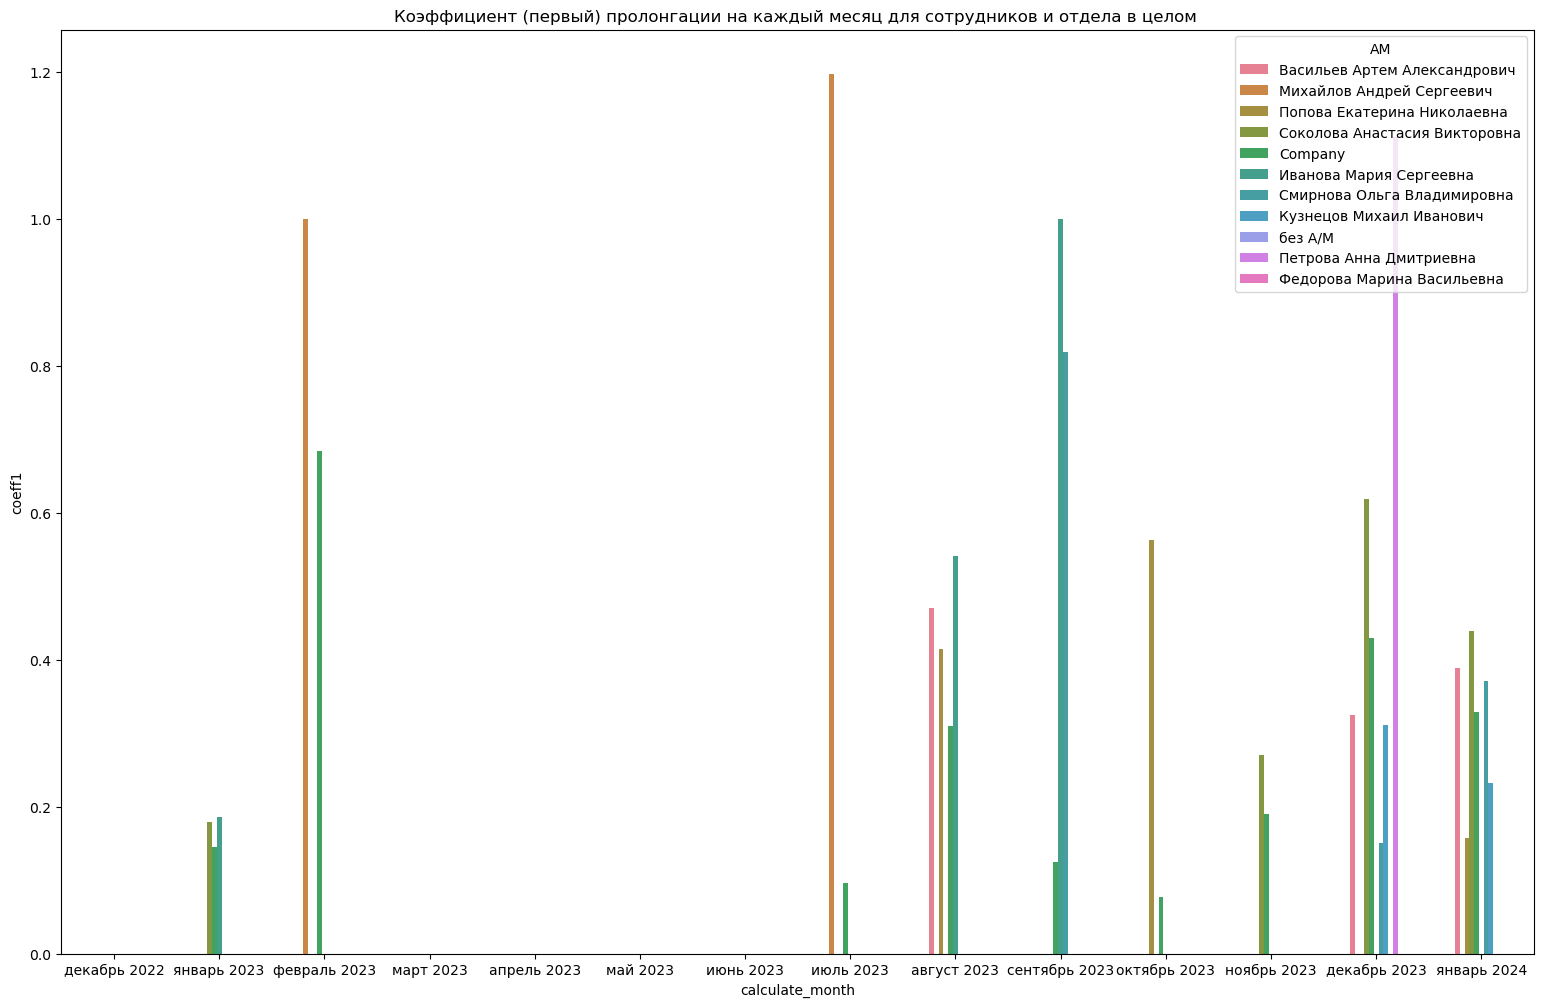

<Figure size 640x480 with 0 Axes>

In [65]:
fig = plt.figure(figsize = (19, 12))
axes = sns.barplot(data = result_first_ratio, x = 'calculate_month', y = 'coeff1', hue = 'AM', width= 0.5)
axes.set_title('Коэффициент (первый) пролонгации на каждый месяц для сотрудников и отдела в целом ')
plt.show()
plt.savefig('Ratio_prolongation_first', bbox_inches = 'tight')

('январь 2023', 'декабрь 2022')

In [381]:
import pytest
def test_spaces():
    assert clean_num_str("1 000 000") == "1000000"
def test_commas():
    assert clean_num_str("123,45") == "123.45"
def test_determining_month():
    prev, prev2 = determine_month('август 2023')
    assert prev == 'июль 2023'
    assert prev2 == 'июнь 2023'

test_spaces()
test_commas()
test_determining_month()
print('все тесты пройдены')

все тесты пройдены


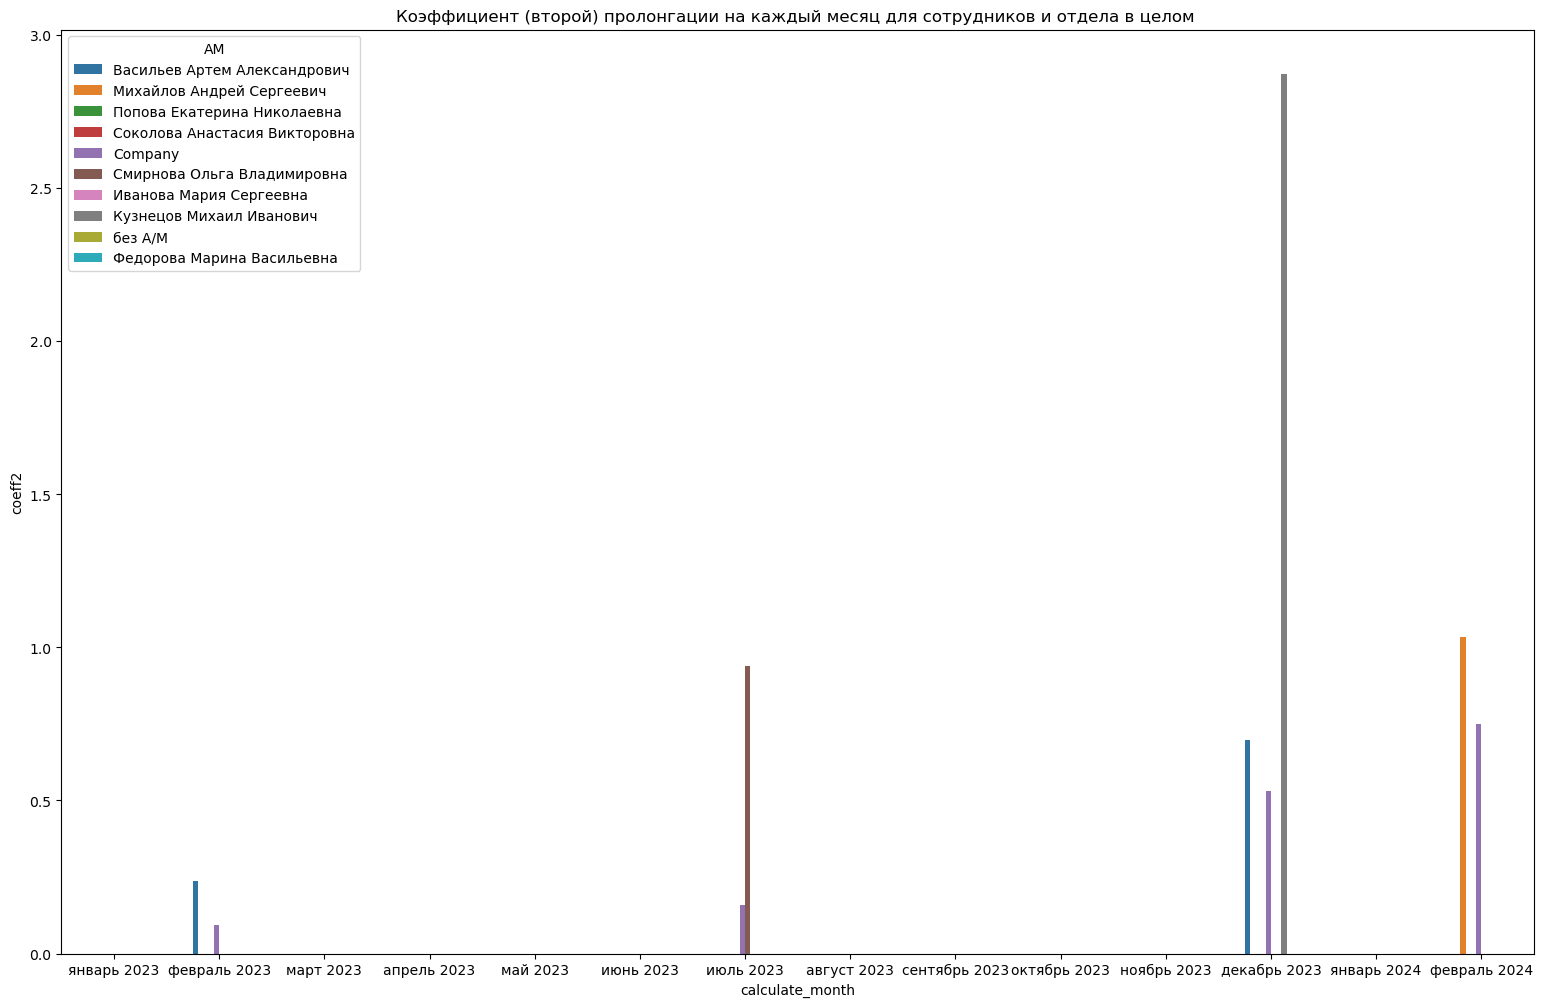

<Figure size 640x480 with 0 Axes>

In [68]:
fig = plt.figure(figsize = (19, 12))
axes = sns.barplot(data = result_second_ratio, x = 'calculate_month', y = 'coeff2', hue = 'AM', width= 0.5)
axes.set_title('Коэффициент (второй) пролонгации на каждый месяц для сотрудников и отдела в целом ')
plt.show()
plt.savefig('Ratio_prolongation_second_for_every_month', bbox_inches = 'tight')

In [70]:
result_first_ratio['calculate'] = result_first_ratio['calculate_month'].apply(lambda s: 
                                                                pd.to_datetime(f"{dic_for_russian_month[s.split()[0]]}-01-{s.split()[1]}")
                                                                )
result_first_ratio.info()

KeyError: 'calculate_month'